# Final Project Baseline

Load train and test data: assess shape to confirm we have way more observations in the test set than in the training set. We know that we must put a lot of effort in making sure the model generalizes well (think about variance versus bias). 

**Observations:**
- A lot more test data than training data. Our models must generalize well. 
- Our training data has to be shuffled.  
- Since we will be comparing models, we may consider creating a dev set. If we use a dev set:
    - I really liked this [article](https://www.fast.ai/2017/11/13/validation-sets/) that provided good guidance on how to construct a meaningful validation set. 
    - Not sure what the split should be here. I have seen [70/20/10](https://www.youtube.com/watch?v=d1Xm9gmEY1A) for train, dev and test, but our original train/test split is very different. Plus, our model should generalize well. 
- Could we use cross validation? From the article above, it appears that it is rarely applicable to real-world problems, unless using a random validation set makes a lot of sense. 
- As such, data exploration may be a good place to start! 
- How to leverage ensemble methods to obtain the best result?  

**Data Management considerations:**
- Scaling the data
- Shuffling the data
- Feature selection (using the validation set)

**Measures of interest:**
- Variance versus bias. 
- Are we trying to maximize accuracy, precision, recall? 

**Algorithms:**
- kNN with k =1 
- Multinomial regression
- Random forest
- Neural networks

In [1]:
import numpy as np
import zipfile
from pandas.plotting import scatter_matrix
import pandas as pd

In [51]:
from numpy import genfromtxt
train_data = genfromtxt('forest-cover-type-prediction/train.csv', delimiter=',')

In [52]:
train_data.shape

(15121, 56)

In [53]:
train_data[0:5,:]

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [ 1.000e+00,  2.596e+03,  5.100e+01,  3.000e+00,  2.580e+02,
         0.000e+00,  5.100e+02,  2.210e+02,  2.320e+02,  1.480e+02,
         6.279e+03,  1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e

In [54]:
train_data = train_data[1:,:].copy()

In [55]:
train_data.shape

(15120, 56)

#We have loaded our csv training data
#We know what the columns mean
0. count
1. elevation
2. aspect
3. slope
4. Horizontal_Distance_To_Hydrology
5. Horizontal_Distance_To_Roadways
6. Hillshade_9am
7. Hillshade_Noon
8. Hillshade_3pm
9. Horizontal_Distance_To_Fire_Points  
"10-13". Wilderness_Area  
"14-54". Soil_Type  
"55". Cover_Type (our output)

In [64]:
df_train = pd.read_csv('forest-cover-type-prediction/train.csv', index_col='Id')
df_test = pd.read_csv('forest-cover-type-prediction/test.csv', index_col='Id')

In [129]:
df_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [65]:
df_test.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,...,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000
mean,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,1992.826227,...,0.044768,0.091588,0.078704,0.002808,0.003161,0.000193,0.000467,0.026233,0.023236,0.014651
std,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,1327.396895,...,0.206795,0.288444,0.269277,0.052916,0.056137,0.013877,0.021594,0.159827,0.150652,0.120152
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,1723.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3164.000000,260.000000,18.000000,390.000000,69.000000,3349.000000,231.000000,237.000000,168.000000,2561.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

## Plotting basic distributions and box plots

In [78]:
print(df_train.shape)

(15120, 55)


### Continuous

In [72]:
df_num_train = df_train.iloc[:, 0:10]
print(df_num_train.shape)

(15120, 10)


### Binary

In [146]:
df_cat_train = df_train.iloc[:, 10:54]
print(df_cat_train.shape)

(15120, 44)


In [222]:
#Transform binary into a few categorical variables
df_wild_train = df_cat_train.iloc[:, 0:4]
wilderness = pd.Series(df_wild_train.columns[np.where(df_wild_train!=0)[1]])
df_wild_train.insert(0, "wilderness", wilderness, True)

In [229]:
df_soil_train = df_cat_train.iloc[:, 5:]
soil = pd.Series(df_soil_train.columns[np.where(df_soil_train!=0)[1]])
df_soil_train.insert(0, "soil", soil, True)

### Categorical Output

In [80]:
df_output_train = df_train.iloc[:, 54:]
print(df_output_train.shape)

(15120, 1)


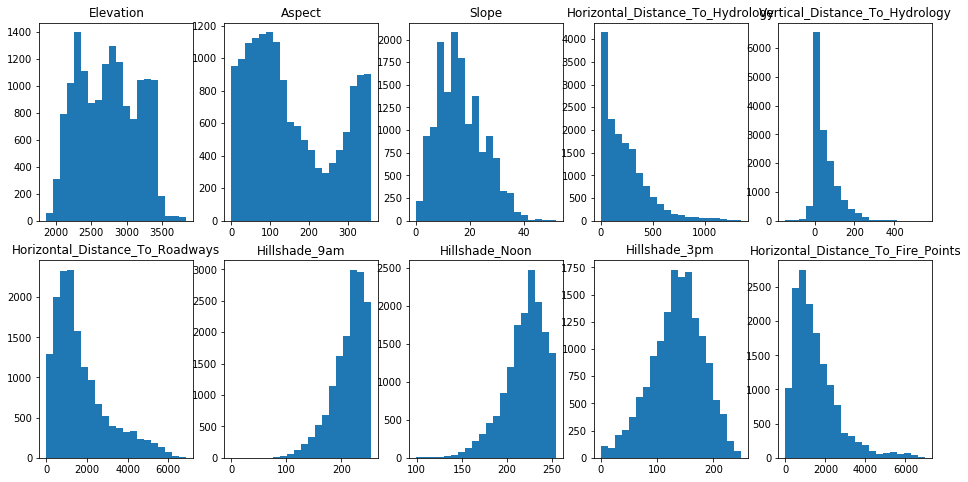

In [101]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

# Iterate over the features, creating a subplot with a histogram for each one.
for feature in range(df_num_train.shape[1]):
    plt.subplot(2, 5, feature+1)
    plt.hist(df_num_train.iloc[:,feature],20)
    plt.title(df_num_train.columns[feature])

<Figure size 1152x576 with 0 Axes>

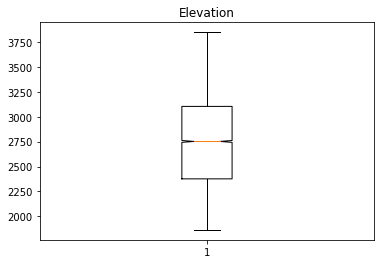

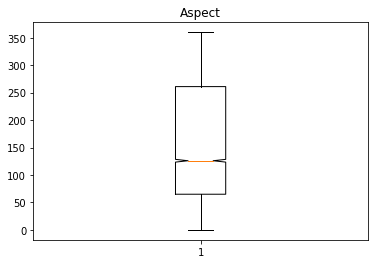

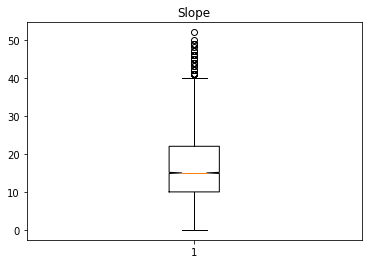

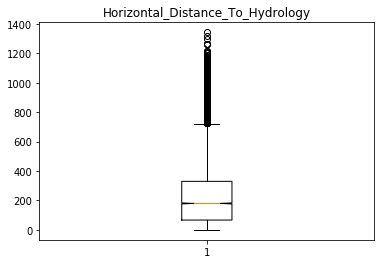

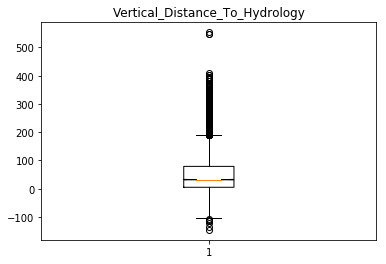

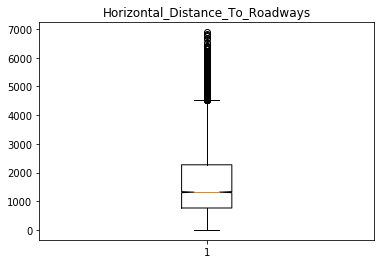

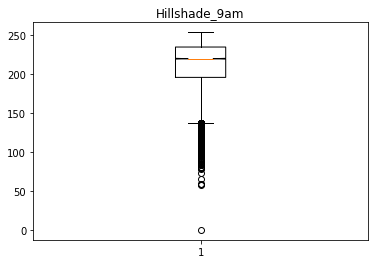

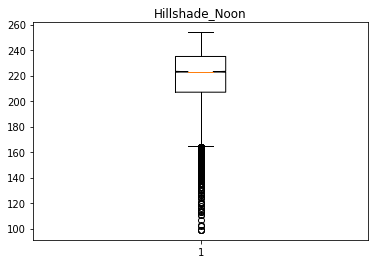

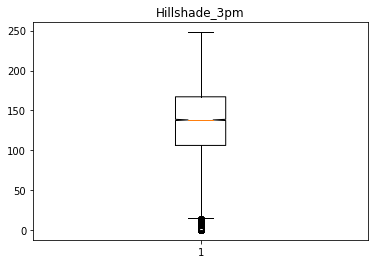

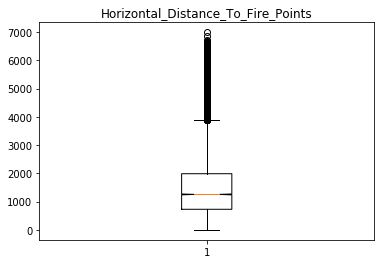

In [160]:
plt.figure(figsize=(16, 8))

# Iterate over the features, creating a subplot with a histogram for each one.
for feature in range(df_num_train.shape[1]):
    fig1, ax1 = plt.subplots()
    ax1.set_title(df_num_train.columns[feature])
    ax1.boxplot(df_num_train.iloc[:,feature],20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cbda080>,
      dtype=object)

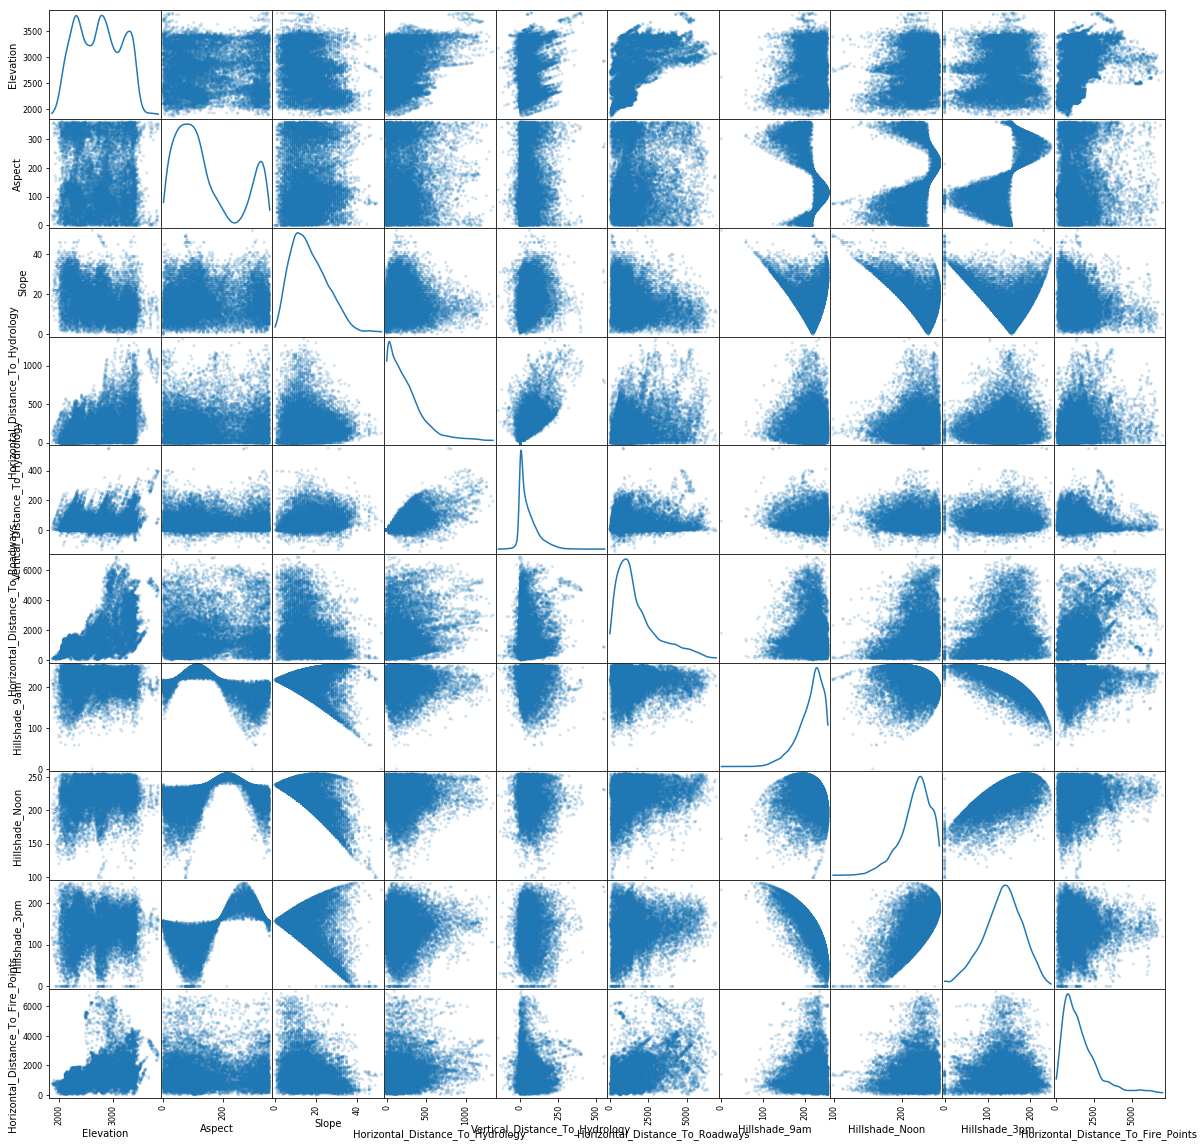

In [161]:
scatter_matrix(df_num_train, alpha=0.2, figsize=(20, 20), diagonal='kde')

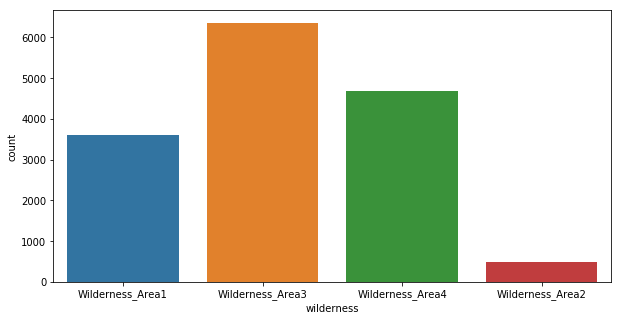

In [135]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x = "wilderness", data = df_wild_train)

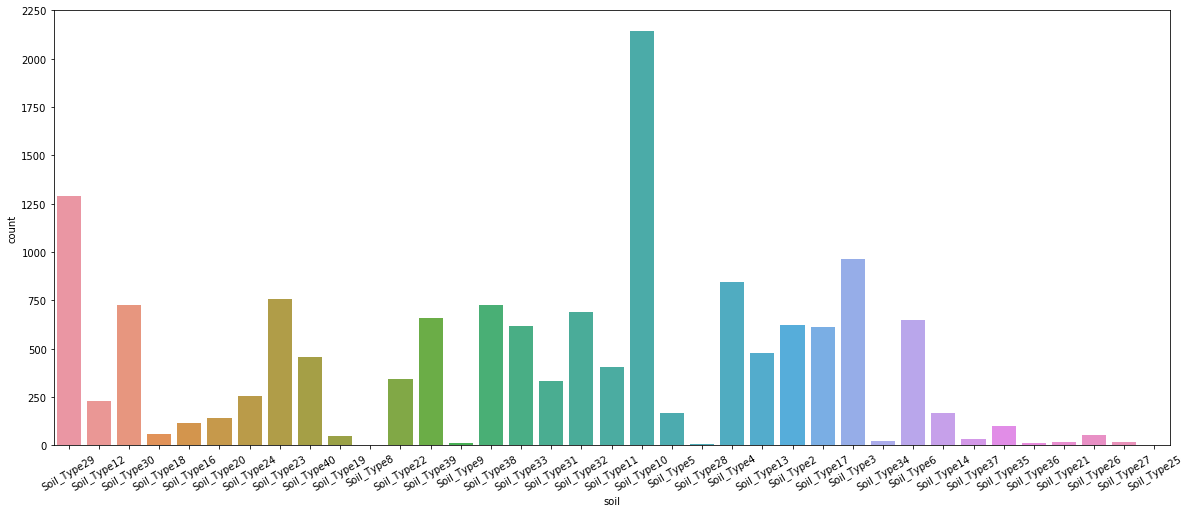

In [158]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax = sns.countplot(x = "soil", data = df_soil_train)

## Plotting the output

In [192]:
df_num_train.insert(10, "cover", df_output_train['Cover_Type'], True)

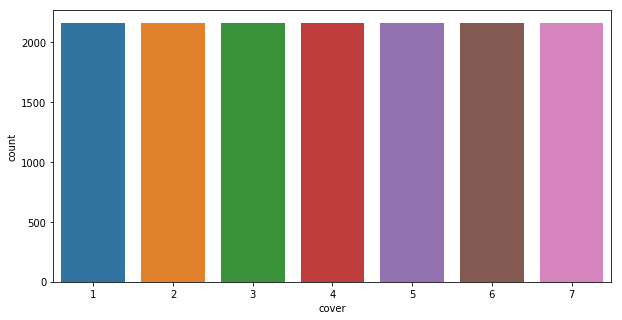

In [213]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x = "cover", data = df_num_train)

<Figure size 1152x576 with 0 Axes>

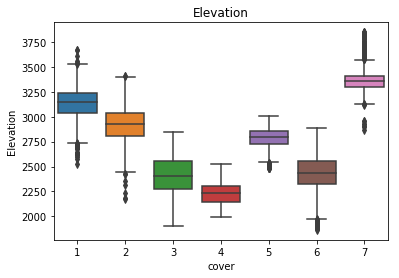

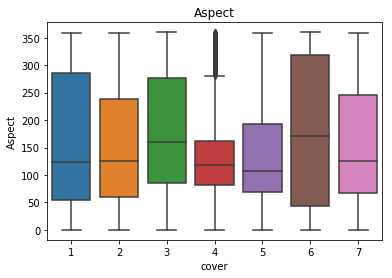

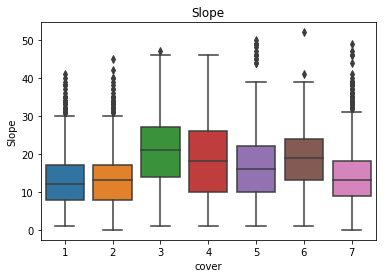

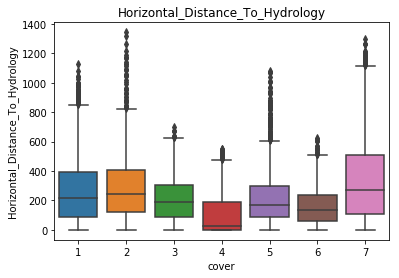

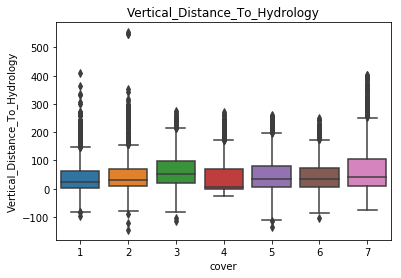

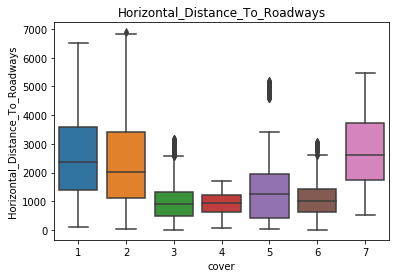

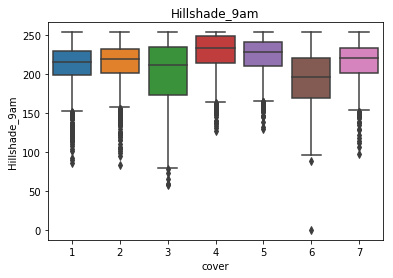

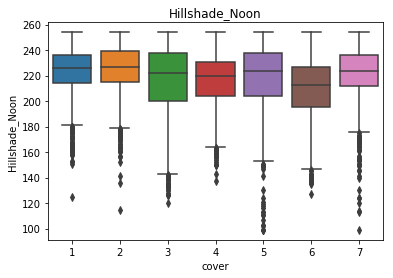

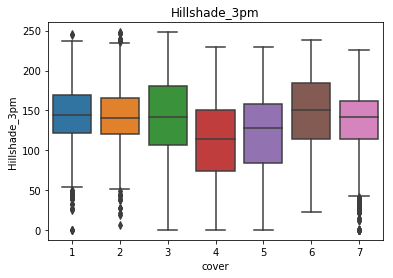

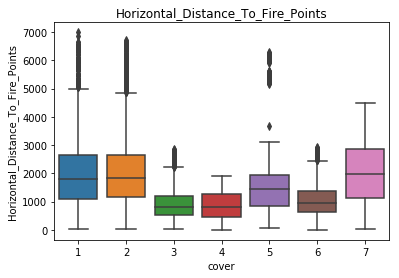

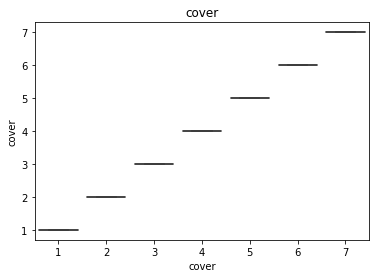

In [211]:
plt.figure(figsize=(16, 8))

# Iterate over the features, creating a subplot with a histogram for each one.
for feature in range(df_num_train.shape[1]):
    fig1, ax1 = plt.subplots()
    ax1.set_title(df_num_train.columns[feature])
    ax = sns.boxplot(x = df_num_train.iloc[:,10] , y= df_num_train.iloc[:,feature], data = df_num_train)

In [215]:
df_wild_train.shape

(15120, 5)

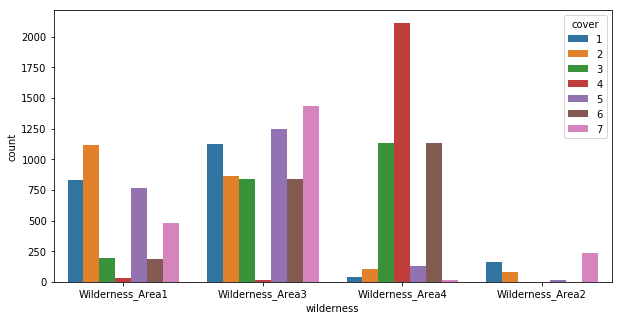

In [223]:
df_wild_train.insert(5, "cover", df_output_train['Cover_Type'], True)
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x = "wilderness", hue = "cover", data = df_wild_train)

In [226]:
df_soil_train.shape

(15120, 40)

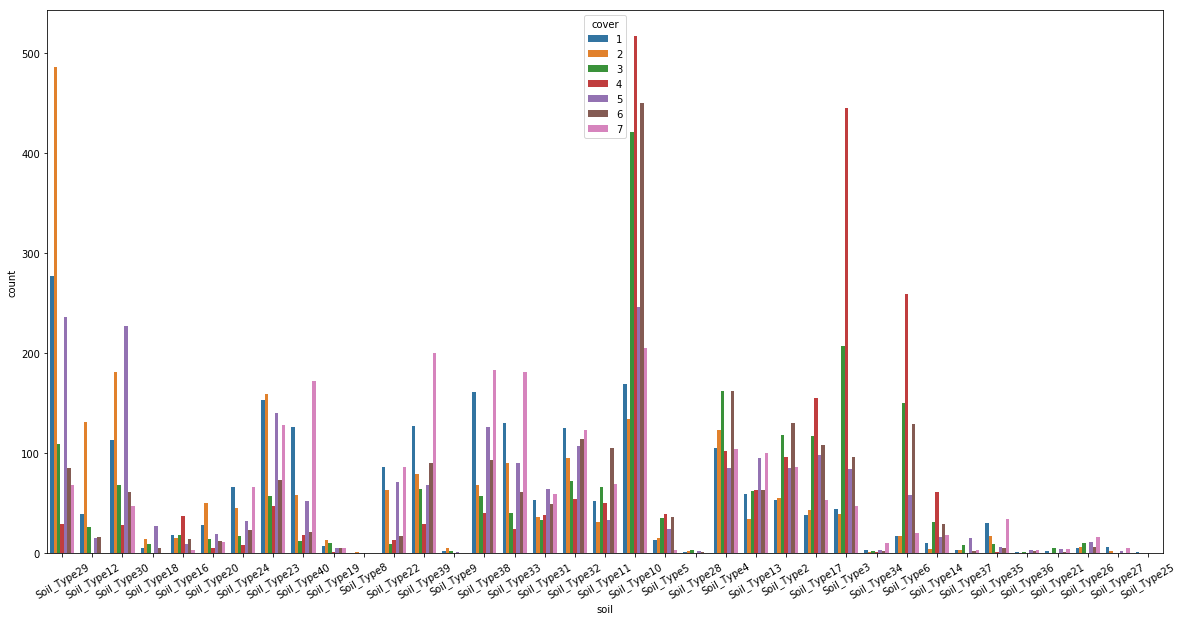

In [232]:
#df_soil_train.insert(40, "cover", df_output_train['Cover_Type'], True)
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax = sns.countplot(x = "soil", hue = "cover", data = df_soil_train)

# Defining train, dev datasets

In [62]:
n_train_data = train_data.shape[0]

In [63]:
n_train = n_train_data*0.55
n_dev = n_train_data*0.45

In [ ]:
dev = train_data[1:]

In [31]:
X_train = train[:,:55]
Y_train = train[:,55]

In [32]:
print(X_train.shape)
print(Y_train.shape)

(15120, 55)
(15120,)


# Data Normalization

In [30]:
from sklearn import preprocessing

In [33]:
X_scaled = preprocessing.scale(X_train)

In [44]:
X_scaled[:,1].max()

2.632921342795481

In [38]:
#Define the standard scaler to re-apply to the testing set. 
scaler = preprocessing.StandardScaler().fit(X_train)

In [48]:
scaler.mean_

array([7.56050000e+03, 2.74932255e+03, 1.56676653e+02, 1.65015873e+01,
       2.27195701e+02, 5.10765212e+01, 1.71402321e+03, 2.12704299e+02,
       2.18965608e+02, 1.35091997e+02, 1.51114729e+03, 2.37896825e-01,
       3.30026455e-02, 4.19907407e-01, 3.09193122e-01, 2.34788360e-02,
       4.12037037e-02, 6.36243386e-02, 5.57539683e-02, 1.09126984e-02,
       4.29894180e-02, 0.00000000e+00, 6.61375661e-05, 6.61375661e-04,
       1.41666667e-01, 2.68518519e-02, 1.50132275e-02, 3.14814815e-02,
       1.11772487e-02, 0.00000000e+00, 7.53968254e-03, 4.04761905e-02,
       3.96825397e-03, 3.04232804e-03, 9.19312169e-03, 1.05820106e-03,
       2.28174603e-02, 5.00661376e-02, 1.69973545e-02, 6.61375661e-05,
       3.57142857e-03, 9.92063492e-04, 5.95238095e-04, 8.53835979e-02,
       4.79497354e-02, 2.19576720e-02, 4.56349206e-02, 4.07407407e-02,
       1.45502646e-03, 6.74603175e-03, 6.61375661e-04, 2.24867725e-03,
       4.81481481e-02, 4.34523810e-02, 3.03571429e-02])

# Baseline

In [ ]:
#Shuffling the data - suggesting that the validation set should be picked at random
